In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# --- Step 1: Prepare data (Age, Spending Score) ---
# Replace this with your actual data
X = np.array([
    [19, 15],
    [21, 39],
    [20, 81],
    [23, 6],
    [31, 77],
    [22, 40],
    [35, 76],
    [23, 6],
    [64, 45],
    [30, 54]
    # add as many customers as needed
], dtype=float)

# --- Step 2: Impute missing values if any ---
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# --- Step 3: Scale features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# --- Step 4: Apply KMeans ---
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# --- Step 5: Get centroids in original scale ---
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

# --- Step 6: Name clusters based on centroids ---
cluster_names = {}
for i, c in enumerate(centroids_original):
    age, spending_score = c

    if age < 30 and spending_score < 50:
        cluster_names[i] = "Young Low Income"
    elif age < 30 and spending_score >= 50:
        cluster_names[i] = "Young High Income"
    elif age >= 30 and spending_score < 50:
        cluster_names[i] = "Old Low Income"
    else:
        cluster_names[i] = "Old High Income"

# --- Step 7: Output cluster assignments ---
for idx, (customer, label) in enumerate(zip(X, labels)):
    print(f"Customer {idx+1}: Age={customer[0]}, Spending Score={customer[1]}, "
          f"Cluster={label}, Segment={cluster_names[label]}")

# --- Step 8: Predict new customer ---
new_customer = [[56, 16]]  # Age, Spending Score
new_customer_imputed = imputer.transform(new_customer)
new_customer_scaled = scaler.transform(new_customer_imputed)
predicted_cluster = kmeans.predict(new_customer_scaled)

print("\nNew customer prediction:")
print(f"Predicted cluster: {predicted_cluster[0]}")
print(f"Predicted segment: {cluster_names[predicted_cluster[0]]}")


Customer 1: Age=19.0, Spending Score=15.0, Cluster=0, Segment=Young Low Income
Customer 2: Age=21.0, Spending Score=39.0, Cluster=3, Segment=Young Low Income
Customer 3: Age=20.0, Spending Score=81.0, Cluster=1, Segment=Young High Income
Customer 4: Age=23.0, Spending Score=6.0, Cluster=0, Segment=Young Low Income
Customer 5: Age=31.0, Spending Score=77.0, Cluster=1, Segment=Young High Income
Customer 6: Age=22.0, Spending Score=40.0, Cluster=3, Segment=Young Low Income
Customer 7: Age=35.0, Spending Score=76.0, Cluster=1, Segment=Young High Income
Customer 8: Age=23.0, Spending Score=6.0, Cluster=0, Segment=Young Low Income
Customer 9: Age=64.0, Spending Score=45.0, Cluster=2, Segment=Old Low Income
Customer 10: Age=30.0, Spending Score=54.0, Cluster=3, Segment=Young Low Income

New customer prediction:
Predicted cluster: 2
Predicted segment: Old Low Income


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [4]:
df = pd.read_csv("spotify_tracks_with_metadata_10000.csv")


In [5]:
df_numeric = df[['danceability', 'energy', 'valence', 'tempo', 'duration_ms', 'popularity']]


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)


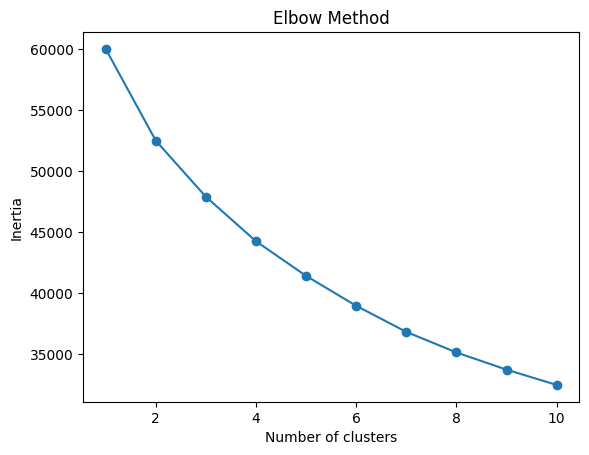

In [7]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [ ]:
k = 4 
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [13]:
print(df['cluster'].value_counts())

df.groupby('cluster')[['danceability', 'energy', 'valence', 'tempo', 'duration_ms', 'popularity']].mean()


cluster
2    2563
3    2541
1    2499
0    2397
Name: count, dtype: int64


,danceability,energy,valence,tempo,duration_ms,popularity
cluster,,,,,,
0,0.514444,0.523468,0.257730,124.248936,221273.857322,76.756779
1,0.504218,0.543367,0.724134,90.815398,201550.884754,47.742697
2,0.472908,0.423939,0.727581,166.116953,208971.810378,55.129536
3,0.486557,0.529768,0.278761,136.823455,211571.501771,22.731208


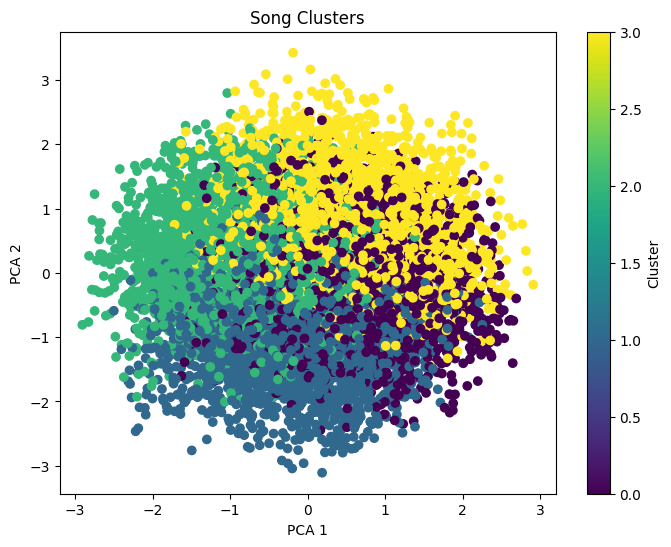

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Song Clusters')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
new_song = pd.DataFrame({
    'danceability': [0.8],
    'energy': [0.6],
    'valence': [0.7],
    'tempo': [120],
    'duration_ms': [210000],
    'popularity': [75]
})

new_song_scaled = scaler.transform(new_song)
predicted_cluster = kmeans.predict(new_song_scaled)
print("Predicted cluster for the new song:", predicted_cluster[0])


Predicted cluster for the new song: 1


In [14]:
cluster_id = predicted_cluster[0]

recommended_songs = df[df['cluster'] == cluster_id]

recommended_songs.head()


,track_name,artist,genre,playlist_category,danceability,energy,valence,tempo,duration_ms,popularity,cluster
3,Love Wave Night,Artist_389,Pop,Workout,0.599,0.607,0.663,90.66,90342,71,1
16,Sky Dance Heart,Artist_281,Country,Party,0.304,0.007,0.742,63.62,65786,21,1
17,Heart Wave,Artist_88,Indie,Workout,0.525,0.240,0.972,74.38,88878,28,1
35,Night Sky Beat,Artist_352,Pop,Workout,0.808,0.345,0.813,107.45,185362,34,1
38,Light Fire Dream,Artist_145,Bollywood,Chill,0.684,0.563,0.895,65.70,357340,68,1


In [15]:
features = ['danceability', 'energy', 'valence', 'tempo', 'duration_ms', 'popularity']


In [16]:
cluster_songs = df[df['cluster'] == cluster_id].copy()

cluster_songs_scaled = scaler.transform(cluster_songs[features])


In [17]:
from sklearn.metrics.pairwise import euclidean_distances

distances = euclidean_distances(new_song_scaled, cluster_songs_scaled)[0]
cluster_songs['distance'] = distances


In [18]:
top_n = 5
recommendations = cluster_songs.sort_values('distance').head(top_n)

recommendations


,track_name,artist,genre,playlist_category,danceability,energy,valence,tempo,duration_ms,popularity,cluster,distance
107,Fire Sky Dream,Artist_38,Country,Party,0.756,0.512,0.829,115.62,220717,80,1,0.613078
3951,Wave Heart,Artist_4,Bollywood,Party,0.835,0.753,0.788,114.12,219670,74,1,0.650797
1546,Wave Love,Artist_137,Bollywood,Workout,0.806,0.509,0.708,105.90,213432,58,1,0.758940
3793,Beat Light Fire,Artist_58,Country,Romantic,0.739,0.762,0.720,133.09,171965,74,1,0.813844
7982,Night Beat,Artist_242,Indie,Chill,0.688,0.724,0.792,116.93,191406,61,1,0.854072
